In [1]:
# necessary import

import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
from sklearn import (datasets,
                     metrics,
                     model_selection as skms,
                     linear_model,
                     neighbors)

diabetes = datasets.load_diabetes()
(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_trgts, diabetes_test_trgts) = skms.train_test_split(diabetes.data,
                                                                    diabetes.target,
                                                                    test_size=.25)
len(diabetes_train_ftrs), len(diabetes_test_ftrs)

(331, 111)

In [3]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head(3)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


In [4]:
diabetes_df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


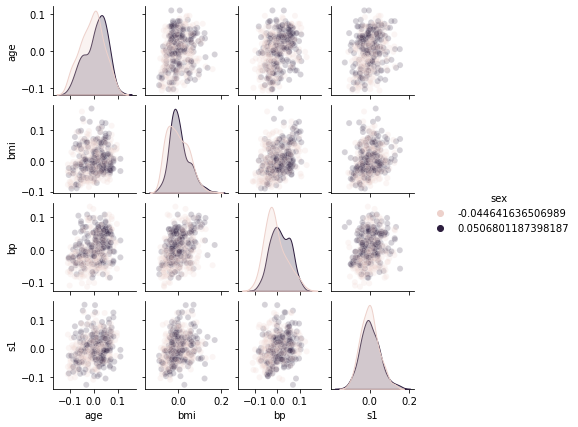

In [8]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             height=1.5, 
             hue='sex', 
             plot_kws={'alpha':.2});

# Regression

## Linear Regression and kNN for Regression

### Linear Regression
Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression. Since linear regression shows the linear relationship, which means it finds how the value of the dependent variable is changing according to the value of the independent variable.
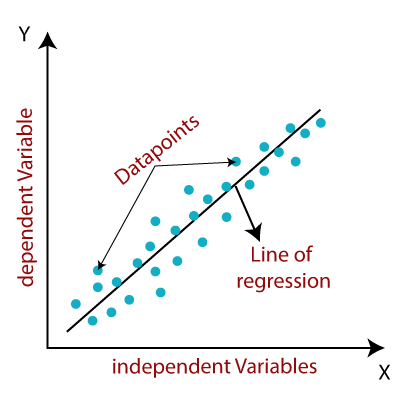
When working with linear regression, our main goal is to find the best fit line that means the error between predicted values and actual values should be minimized. The best fit line will have the least error.

### KNN For Regression
A simple implementation of KNN regression is to calculate the average of the numerical target of the K nearest neighbors.  Another approach uses an inverse distance weighted average of the K nearest neighbors. KNN regression uses the same distance functions as KNN classification.
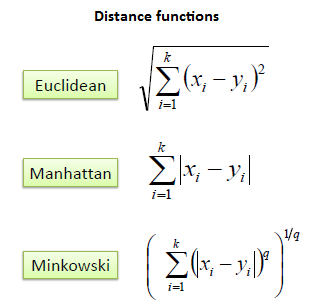

In [9]:
# finding the nearest neigbors and then combine them to make a value for the prediction
distances = np.array([4.0, 2.0, 2.0])
closeness = 1.0 / distances
closeness

array([0.25, 0.5 , 0.5 ])

In [10]:
weights = closeness / closeness.sum()
weights

array([0.2, 0.4, 0.4])

In [11]:
neigh_vals = np.array([79.1, 88.3, 101.2])
np.dot(neigh_vals, weights)

91.62

In [15]:
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
fit = knn.fit(diabetes_train_ftrs, diabetes_train_trgts)
preds = knn.predict(diabetes_test_ftrs)

metrics.mean_squared_error(diabetes_test_trgts, preds)

3461.3013013013015

In [16]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

In [17]:
np.sqrt(3461)

58.83026432033091